## Diversity in the Workforce - Group 6 Midterm Project

### Our libraries and dataset overview

In [2]:
#Importing all libraries needed
import pandas as pd
import os
import matplotlib.pyplot as plt
#import scipy

In [3]:
# Taking into consideration other systems
file = os.path.join('Resources', 'HRDataset_v14.csv')
file

#This is our main file with HR Data
HR_data = pd.read_csv(file)
HR_data

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Patronick, Lucas",10005,0,0,1,5,4,4,1,108987,...,Alex Sweetwater,10.0,Diversity Job Fair,Exceeds,5.00,5,3,8/16/15,0,13
1,"Bunbury, Jessica",10188,1,1,0,5,6,3,0,74326,...,John Smith,17.0,Google Search,Fully Meets,3.14,5,0,2/10/13,1,19
2,"Baczenski, Rachael",10252,1,1,0,5,5,3,1,54670,...,David Stanley,14.0,Diversity Job Fair,Fully Meets,4.20,4,0,1/30/16,0,12
3,"Barton, Nader",10066,0,2,1,5,5,3,0,52505,...,Michael Albert,22.0,On-line Web application,Fully Meets,5.00,5,0,3/2/17,0,1
4,"Brill, Donna",10177,1,1,0,5,5,3,0,53492,...,David Stanley,14.0,Google Search,Fully Meets,3.35,4,0,3/4/13,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Pelletier, Ermine",10297,1,1,0,5,5,2,0,60270,...,Amy Dunn,11.0,CareerBuilder,Needs Improvement,2.40,5,0,2/6/15,5,2
307,"Purinton, Janine",10262,0,2,0,5,5,3,0,46430,...,Kissy Sullivan,20.0,Indeed,Fully Meets,4.50,5,0,4/2/13,0,16
308,"Squatrito, Kristen",10030,0,2,0,5,5,4,0,62425,...,David Stanley,14.0,LinkedIn,Exceeds,4.10,4,0,3/2/15,0,16
309,"Trzeciak, Cybil",10270,0,0,0,5,5,3,0,74813,...,Amy Dunn,11.0,LinkedIn,Fully Meets,4.40,3,0,1/5/14,0,5


### Question 1: How does marital status affect performance?

In [4]:
#Reading the first few lines of data
HR_data.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Patronick, Lucas",10005,0,0,1,5,4,4,1,108987,...,Alex Sweetwater,10.0,Diversity Job Fair,Exceeds,5.00,5,3,8/16/15,0,13
1,"Bunbury, Jessica",10188,1,1,0,5,6,3,0,74326,...,John Smith,17.0,Google Search,Fully Meets,3.14,5,0,2/10/13,1,19
2,"Baczenski, Rachael",10252,1,1,0,5,5,3,1,54670,...,David Stanley,14.0,Diversity Job Fair,Fully Meets,4.20,4,0,1/30/16,0,12
3,"Barton, Nader",10066,0,2,1,5,5,3,0,52505,...,Michael Albert,22.0,On-line Web application,Fully Meets,5.00,5,0,3/2/17,0,1
4,"Brill, Donna",10177,1,1,0,5,5,3,0,53492,...,David Stanley,14.0,Google Search,Fully Meets,3.35,4,0,3/4/13,0,6


In [5]:
#Grouping the columns by Marital Status and Performance Score
grouped_married_df = HR_data.groupby('MaritalDesc')['PerformanceScore']

#Grouping by "married" instance and Performance Score
grouped_married_v2_df = HR_data.groupby('MarriedID')['PerformanceScore']


In [6]:
#Adding a counts and percentage column to the grouped by dataframe
grouped_married_df = pd.concat([grouped_married_df.value_counts(),
                                grouped_married_df.value_counts(normalize=True).mul(100)],axis=1, keys=('Counts','Percentage'))

grouped_married_v2_df = pd.concat([grouped_married_v2_df.value_counts(),
                                grouped_married_v2_df.value_counts(normalize=True).mul(100)],axis=1, keys=('Counts','Percentage'))

grouped_married_df

Counts  Percentage
MaritalDesc PerformanceScore                     
Divorced    Fully Meets            23   76.666667
            Exceeds                 5   16.666667
            Needs Improvement       2    6.666667
Married     Fully Meets           100   80.645161
            Exceeds                11    8.870968
            Needs Improvement       7    5.645161
            PIP                     6    4.838710
Separated   Fully Meets             9   75.000000
            Exceeds                 2   16.666667
            PIP                     1    8.333333
Single      Fully Meets           104   75.912409
            Exceeds                18   13.138686
            Needs Improvement       9    6.569343
            PIP                     6    4.379562
Widowed     Fully Meets             7   87.500000
            Exceeds                 1   12.500000

In [7]:
#Checking the counts of the general marital status view
grouped_married_v2_df = grouped_married_v2_df.sort_values(by=['Counts'],ascending=True)
grouped_married_v2_df 

,,Counts,Percentage
MarriedID,PerformanceScore,,
1,PIP,6,4.838710
0,PIP,7,3.743316
1,Needs Improvement,7,5.645161
0,Needs Improvement,11,5.882353
1,Exceeds,11,8.870968
0,Exceeds,26,13.903743
1,Fully Meets,100,80.645161
0,Fully Meets,143,76.470588


In [8]:
#Getting the 5 number summary for performance score and married ID
summary=HR_data[['PerfScoreID','MarriedID']].describe()
summary

,PerfScoreID,MarriedID
count,311.000000,311.000000
mean,2.977492,0.398714
std,0.587072,0.490423
min,1.000000,0.000000
25%,3.000000,0.000000
50%,3.000000,0.000000
75%,3.000000,1.000000
max,4.000000,1.000000


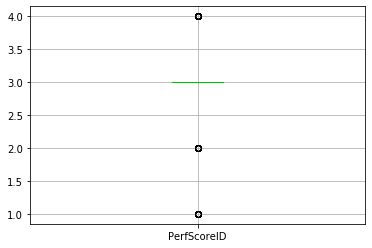

In [8]:
HR_data.boxplot(column = 'PerfScoreID')

In [9]:
# def addlabels(x,y):
#     for i in range(len(x)):
#         plt.text(i,y[i],y[i])

Text(0.5, 1.0, 'Performance by Marital Status Description')

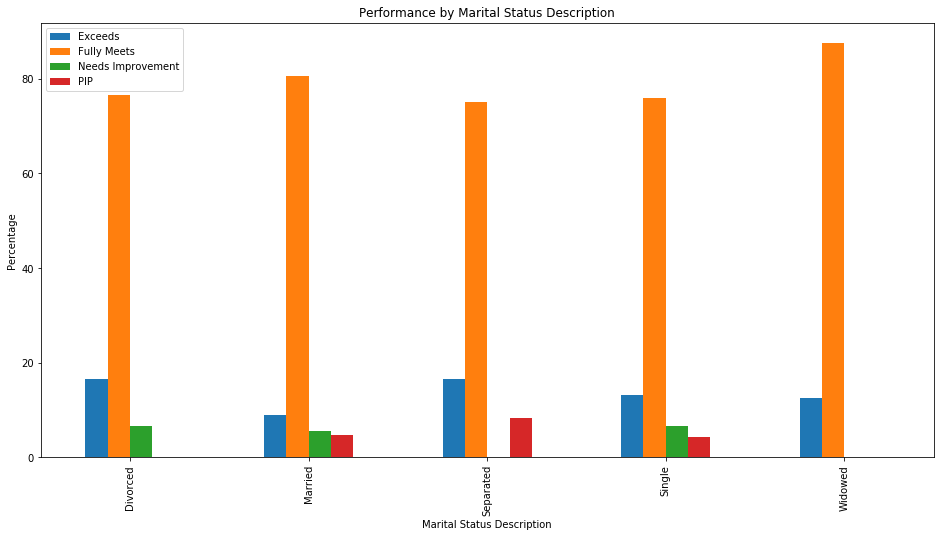

In [10]:
# Bar charts for analysis at two different levels of detail (LOD)
grouped_married_df[('Percentage')].unstack().plot(kind = 'bar', figsize = (16,8))
plt.legend(loc="best")
plt.ylabel('Percentage')
plt.xlabel('Marital Status Description')
plt.title('Performance by Marital Status Description')


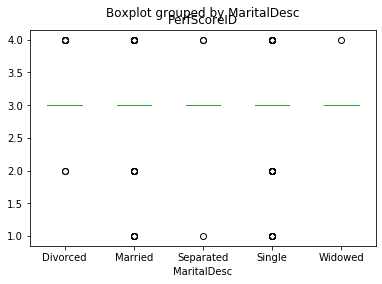

In [11]:
HR_data.boxplot(column = 'PerfScoreID', by = 'MaritalDesc', grid = False)

Text(0.5, 1.0, 'Performance by General Marital Status')

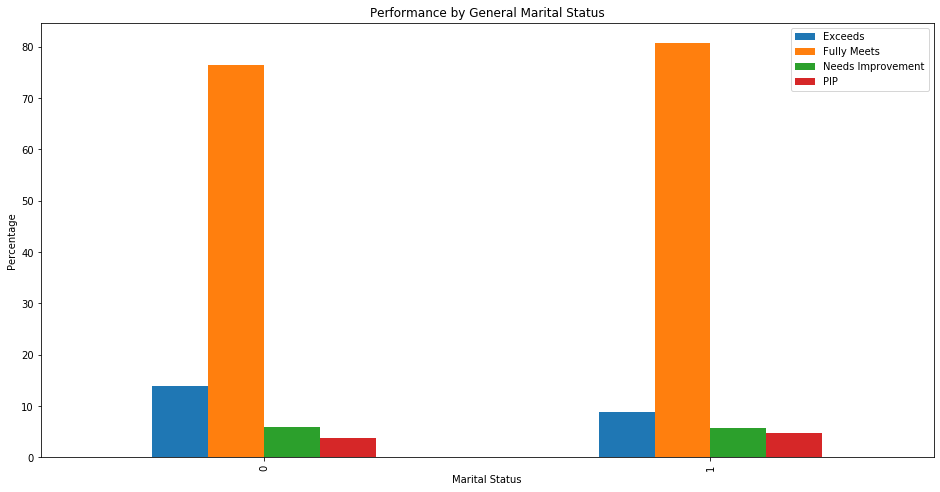

In [12]:
grouped_married_v2_df['Percentage'].unstack().plot(kind = 'bar', figsize = (16,8))
plt.ylabel('Percentage')
plt.legend(loc="best")
plt.xlabel('Marital Status')
plt.title('Performance by General Marital Status')

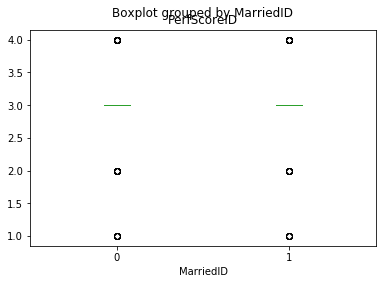

In [13]:
HR_data.boxplot(column = 'PerfScoreID', by = 'MarriedID', grid = False)

## Question 2: What is the overall diversity profile of the organization?

In [14]:
#Overall Diversity base on Ethnicity or Race. 
Race_Desc = HR_data.groupby(['RaceDesc']).count()
Race_Desc.reset_index(inplace = True)

In [15]:
Race_Desc = Race_Desc.sort_values(by=['Employee_Name'],ascending=False)
Race_Desc

,RaceDesc,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
5,White,187,187,187,187,187,187,187,187,187,...,187,183,187,187,187,187,187,187,187,187
2,Black or African American,80,80,80,80,80,80,80,80,80,...,80,79,80,80,80,80,80,80,80,80
1,Asian,29,29,29,29,29,29,29,29,29,...,29,26,29,29,29,29,29,29,29,29
4,Two or more races,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
0,American Indian or Alaska Native,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
3,Hispanic,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


Text(5, 4, '1')

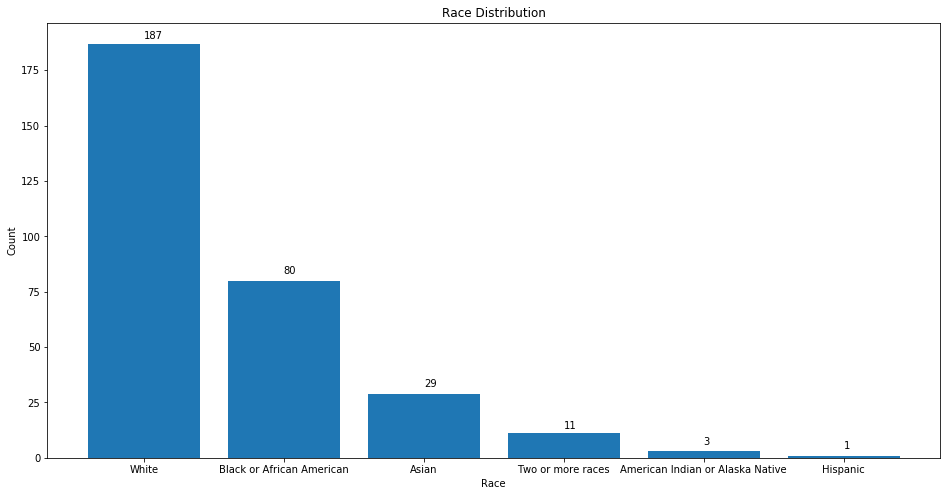

In [16]:
fig = plt.figure(figsize = (16,8))
plt.bar(Race_Desc['RaceDesc'],Race_Desc['Employee_Name'])
plt.ylabel('Count')
plt.xlabel('Race')

plt.title("Race Distribution")


plt.annotate('187', xy=(0,189))
plt.annotate('80', xy=(1,83))
plt.annotate('29', xy=(2,32))
plt.annotate('11', xy=(3,13))
plt.annotate('3', xy=(4,6))
plt.annotate('1', xy=(5,4))

In [17]:
#Overall Diversity base on Gender and Department.
#Overall Diversity base on Gender and Recruitment Source.
#Overall Performance base on Recruitment Source.

In [18]:
Gender = HR_data.groupby(['GenderID']).count()
Gender.reset_index(inplace = True)
Gender

,GenderID,Employee_Name,EmpID,MarriedID,MaritalStatusID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,0,176,176,176,176,176,176,176,176,176,...,176,171,176,176,176,176,176,176,176,176
1,1,135,135,135,135,135,135,135,135,135,...,135,132,135,135,135,135,135,135,135,135


Text(0, 178, '176')

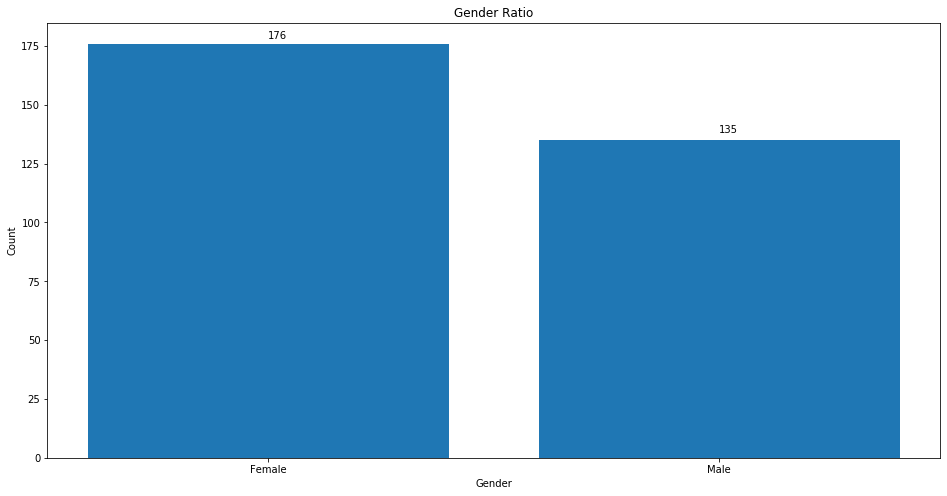

In [19]:
#Overall Diversity base on Gender.
fig = plt.figure(figsize = (16,8))
plt.bar(Gender['GenderID'],Gender['RaceDesc'])

#Fixing our labels on the graph
sex = ["Female","Male"]
plt.xlabel("Gender")
plt.ylabel('Count')

plt.xticks([0,1,], sex)
plt.title("Gender Ratio")

plt.annotate('135', xy=(1,138))
plt.annotate('176', xy=(0,178))

Text(1, 1, '176')

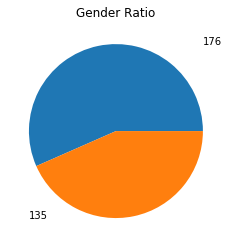

In [20]:
# Creating a pie chart for gender
plt.pie(HR_data['GenderID'].value_counts())
plt.title('Gender Ratio')
plt.annotate('135', xy=(-1,-1))
plt.annotate('176', xy=(1,1))

In [21]:
dept_gen = HR_data.groupby(['Department','Sex']).count()
dept_gen

Employee_Name  EmpID  MarriedID  MaritalStatusID  \
Department           Sex                                                     
Admin Offices        F                6      6          6                6   
                     M                3      3          3                3   
Executive Office     F                1      1          1                1   
IT/IS                F               22     22         22               22   
                     M               28     28         28               28   
Production           F              126    126        126              126   
                     M               83     83         83               83   
Sales                F               15     15         15               15   
                     M               16     16         16               16   
Software Engineering F                6      6          6                6   
                     M                5      5          5                5   

                          GenderID  EmpStatusID  DeptID  PerfScoreID  \
Department           Sex                                               
Admin Offices        F           6            6       6            6   
                     M           3            3       3            3   
Executive Office     F           1            1       1            1   
IT/IS                F          22           22      22           22   
                     M          28           28      28           28   
Production           F         126          126     126          126   
                     M          83           83      83           83   
Sales                F          15           15      15           15   
                     M          16           16      16           16   
Software Engineering F           6            6       6            6   
                     M           5            5       5            5   

                          FromDiversityJobFairID  Salary  ...  ManagerName  \
Department           Sex                                  ...                
Admin Offices        F                         6       6  ...            6   
                     M                         3       3  ...            3   
Executive Office     F                         1       1  ...            1   
IT/IS                F                        22      22  ...           22   
                     M                        28      28  ...           28   
Production           F                       126     126  ...          126   
                     M                        83      83  ...           83   
Sales                F                        15      15  ...           15   
                     M                        16      16  ...           16   
Software Engineering F                         6       6  ...            6   
                     M                         5       5  ...            5   

                          ManagerID  RecruitmentSource  PerformanceScore  \
Department           Sex                                                   
Admin Offices        F            6                  6                 6   
                     M            3                  3                 3   
Executive Office     F            1                  1                 1   
IT/IS                F           22                 22                22   
                     M           28                 28                28   
Production           F          121                126               126   
                     M           80                 83                83   
Sales                F           15                 15                15   
                     M           16                 16                16   
Software Engineering F            6                  6                 6   
                     M            5                  5                 5   

                          EngagementSurvey  EmpSatisfaction  \
Departm

In [22]:
dept_gen = dept_gen.sort_values(by=['Employee_Name'],ascending=False)
dept_gen

Employee_Name  EmpID  MarriedID  MaritalStatusID  \
Department           Sex                                                     
Production           F              126    126        126              126   
                     M               83     83         83               83   
IT/IS                M               28     28         28               28   
                     F               22     22         22               22   
Sales                M               16     16         16               16   
                     F               15     15         15               15   
Admin Offices        F                6      6          6                6   
Software Engineering F                6      6          6                6   
                     M                5      5          5                5   
Admin Offices        M                3      3          3                3   
Executive Office     F                1      1          1                1   

                          GenderID  EmpStatusID  DeptID  PerfScoreID  \
Department           Sex                                               
Production           F         126          126     126          126   
                     M          83           83      83           83   
IT/IS                M          28           28      28           28   
                     F          22           22      22           22   
Sales                M          16           16      16           16   
                     F          15           15      15           15   
Admin Offices        F           6            6       6            6   
Software Engineering F           6            6       6            6   
                     M           5            5       5            5   
Admin Offices        M           3            3       3            3   
Executive Office     F           1            1       1            1   

                          FromDiversityJobFairID  Salary  ...  ManagerName  \
Department           Sex                                  ...                
Production           F                       126     126  ...          126   
                     M                        83      83  ...           83   
IT/IS                M                        28      28  ...           28   
                     F                        22      22  ...           22   
Sales                M                        16      16  ...           16   
                     F                        15      15  ...           15   
Admin Offices        F                         6       6  ...            6   
Software Engineering F                         6       6  ...            6   
                     M                         5       5  ...            5   
Admin Offices        M                         3       3  ...            3   
Executive Office     F                         1       1  ...            1   

                          ManagerID  RecruitmentSource  PerformanceScore  \
Department           Sex                                                   
Production           F          121                126               126   
                     M           80                 83                83   
IT/IS                M           28                 28                28   
                     F           22                 22                22   
Sales                M           16                 16                16   
                     F           15                 15                15   
Admin Offices        F            6                  6                 6   
Software Engineering F            6                  6                 6   
                     M            5                  5                 5   
Admin Offices        M            3                  3                 3   
Executive Office     F            1                  1                 1   

                          EngagementSurvey  EmpSatisfaction  \
Departm

In [23]:
dept_gen = dept_gen.loc[:,["EmpID"]]
dept_gen.rename(columns = {'EmpID':'Count'}, inplace=True)

Text(0.5, 1.0, 'Gender by Department')

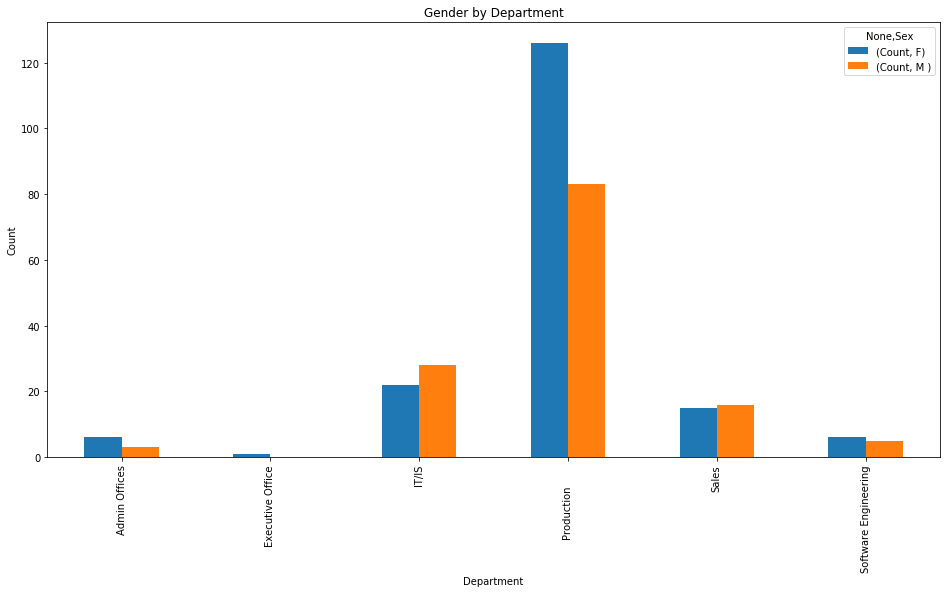

In [24]:
dept_gen.unstack().plot(kind = 'bar', figsize = (16,8))
plt.ylabel('Count')
plt.xlabel('Department')

plt.title("Gender by Department")